In [143]:
#in this file four scaling techniques are used: minmaxscaler, Standard Scaler, MaxAbs Scaler, Robust Scaler, Normalization
#accuracies are:
#MinMax Scaler 65.9
#Standard Scaler 69.1
#MaxAbs Scaler 65.9
#Robust Scaler 58.6
#Normalization 69.4

In [2]:
import os
os.chdir("C:\\Users\\Poori\\Desktop\\Udemy\\A-Z Machine learning Kaggle\\Github\\Python Basics\\Course Files\\datacode")

In [75]:
import pandas as pd
creditrisk=pd.read_csv("cs-training.csv")

In [76]:
creditrisk.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [77]:
creditrisk.columns

Index(['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [78]:
#creditrisk.info() 
creditrisk['SeriousDlqin2yrs'].unique()
#classificatoin problem
#SeriousDlqin2yrs is dependent variables

array([1, 0], dtype=int64)

In [79]:
creditrisk.isnull().sum()
#modifiedDataset=dataset.fillna(" ")
#dataset.fillna(dataset.mean())
#modifiedDataset = dataset.dropna()
creditrisk.isnull().values
#creditrisk.isnull().any(axis=1).sum()
MI=creditrisk[creditrisk['NumberOfDependents'].isnull()]
modified=creditrisk['NumberOfDependents'].fillna(999)
creditrisk['NumberOfDependents']=modified
creditrisk.isnull().sum()
creditrisk[creditrisk['NumberOfDependents']==999]['MonthlyIncome'].isnull().sum()
#creditrisk.columns
creditrisk[creditrisk['NumberOfDependents']==999].index
creditrisk.drop(creditrisk[creditrisk['NumberOfDependents']==999].index, inplace=True)
creditrisk['NumberOfDependents'].size
#creditrisk['MonthlyIncome'].isnull().sum()
#creditrisk.drop('NumberOfDependents',axis=1)

146076

In [80]:
#creditrisk.info()
creditrisk.isnull().sum()
creditrisk.dropna(inplace=True) 

In [81]:
creditrisk.isnull().sum()
creditrisk.shape

(120269, 12)

In [82]:
creditrisk['MonthlyIncome'].mean()
#creditrisk['MonthlyIncome'].isnull()
#plt.hist(creditrisk['MonthlyIncome'])
creditrisk['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [83]:
creditrisk['NumberOfDependents'].unique()

array([ 2.,  1.,  0.,  3.,  4.,  5.,  6.,  8.,  7., 20., 10.,  9., 13.])

In [84]:
creditrisk['NumberOfDependents'].describe
import matplotlib.pyplot as plt
#plt.hist(creditrisk['NumberOfDependents'])
#plt.bar(creditrisk['NumberOfDependents'])
creditrisk['NumberOfDependents'].value_counts()
#creditrisk['MonthlyIncome'].unique()

0.0     65456
1.0     24379
2.0     18110
3.0      8745
4.0      2658
5.0       689
6.0       150
7.0        49
8.0        22
10.0        5
9.0         4
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

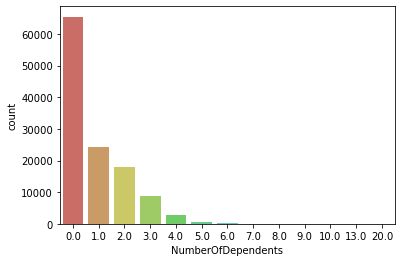

In [85]:
import seaborn as sns
sns.countplot(x='NumberOfDependents',data=creditrisk, palette='hls')
plt.show()

In [86]:
creditrisk.groupby("NumberOfDependents").mean()
#creditrisk.groupby("SeriousDlqin2yrs").mean()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents,,,,,,,,,,,
0.0,75047.140094,0.059490,5.419854,53.635114,0.374511,26.242452,5873.411467,8.487656,0.227924,0.922528,0.207956
1.0,74761.419049,0.074572,5.013580,51.631117,0.368309,14.763965,7205.172361,9.200665,0.186841,1.143525,0.156651
2.0,75368.220872,0.082054,7.647192,46.202209,0.418112,34.358824,7576.163446,9.028879,0.207786,1.261403,0.185036
3.0,75061.130932,0.090566,10.102346,45.636135,0.370726,42.293361,8396.601029,8.914580,0.168897,1.272384,0.131504
4.0,74424.961625,0.104590,2.024736,45.376223,0.451467,32.266914,8691.199398,8.963130,0.209932,1.285553,0.176825
5.0,74985.937591,0.089985,0.395132,45.943396,0.480406,50.657772,9260.174165,9.023222,0.275762,1.304790,0.245283
6.0,74925.900000,0.133333,0.424608,47.133333,0.333333,19.108910,8686.493333,8.893333,0.073333,1.200000,0.073333
7.0,77328.591837,0.102041,0.408293,48.591837,0.387755,42.734145,8934.653061,8.204082,0.142857,1.224490,0.163265
8.0,80669.090909,0.090909,0.315804,49.727273,0.181818,0.238619,8312.954545,7.636364,0.181818,1.272727,0.000000


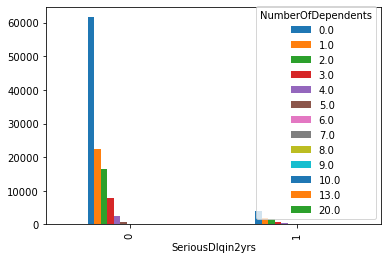

In [87]:
%matplotlib inline
pd.crosstab(creditrisk.SeriousDlqin2yrs,creditrisk.NumberOfDependents).plot(kind='bar')

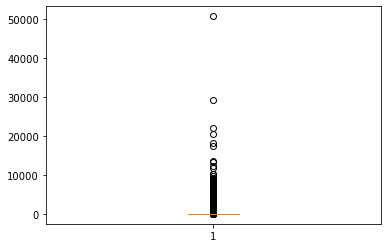

In [88]:
plt.boxplot(creditrisk.RevolvingUtilizationOfUnsecuredLines)
creditrisk.loc[creditrisk["RevolvingUtilizationOfUnsecuredLines"]>20000,'RevolvingUtilizationOfUnsecuredLines'] = 20000

In [89]:
creditrisk[creditrisk["RevolvingUtilizationOfUnsecuredLines"]>20000]

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


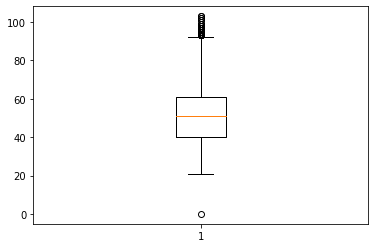

In [90]:
plt.boxplot(creditrisk.age)
creditrisk[creditrisk["age"]<10].index
creditrisk.drop(creditrisk[creditrisk["age"]<10].index, inplace=True)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


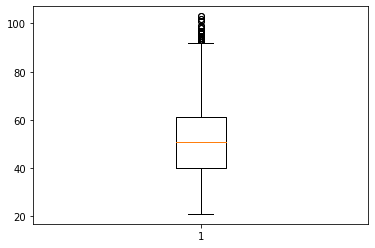

In [91]:
plt.boxplot(creditrisk.age)
creditrisk[creditrisk["age"]<10]

Index(['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

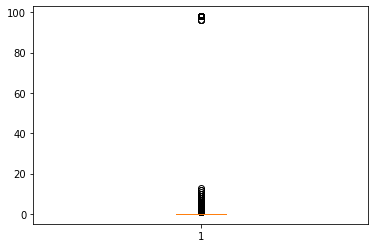

In [92]:
plt.boxplot(creditrisk['NumberOfTime30-59DaysPastDueNotWorse'])
creditrisk[creditrisk['NumberOfTime30-59DaysPastDueNotWorse']>50]
creditrisk.columns
#plt.boxplot(creditrisk['DebtRatio'])
#creditrisk[creditrisk['DebtRatio']>40000]
#plt.hist(creditrisk['MonthlyIncome'])

In [93]:
creditrisk.columns
creditrisk1=creditrisk.drop("ID", axis=1)

In [94]:
creditrisk1.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [42]:
X = creditrisk1.drop("SeriousDlqin2yrs", axis=1)
y = creditrisk1['SeriousDlqin2yrs']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 12,test_size=0.25)


from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

C:\Users\Poori\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


y_pred = regressor.predict(X_test)
y_pred_proba = regressor.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(regressor.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(regressor.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(regressor.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

In [135]:
#this is used for normalization, if there are outliers then min max scaler is not effective. Minmax scaler is sensitive to outliers
X = creditrisk1.drop("SeriousDlqin2yrs", axis=1)
y = creditrisk1['SeriousDlqin2yrs']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
creditrisk_scale = scaler.fit_transform(X)
creditrisk_scale=pd.DataFrame(creditrisk_scale)
creditrisk_scale.columns=X.columns
creditrisk_scale.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.000038,0.292683,0.020408,1.314070e-05,0.003031,0.224138,0.000000,0.111111,0.0,0.10
1,0.000048,0.231707,0.000000,1.994488e-06,0.000864,0.068966,0.000000,0.000000,0.0,0.05
2,0.000033,0.207317,0.010204,1.392869e-06,0.001011,0.034483,0.010204,0.000000,0.0,0.00
3,0.000012,0.109756,0.000000,5.899484e-07,0.001097,0.086207,0.000000,0.000000,0.0,0.00
4,0.000045,0.341463,0.010204,4.079058e-07,0.021134,0.120690,0.000000,0.018519,0.0,0.00


In [58]:
creditrisk_scale.shape
#creditrisk_scale.head()

In [137]:
#X = creditrisk_scale.drop("SeriousDlqin2yrs", axis=1)
#y = creditrisk_scale['SeriousDlqin2yrs']

X=creditrisk_scale

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 12,test_size=0.25)


from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


y_pred = regressor.predict(X_test)
y_pred_proba = regressor.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(regressor.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(regressor.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(regressor.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.931
LogisticRegression log_loss is 0.241
LogisticRegression auc is 0.659


In [103]:
#creditrisk.index.max
#creditrisk.shape

In [122]:
X = creditrisk1.drop("SeriousDlqin2yrs", axis=1)
y = creditrisk1['SeriousDlqin2yrs']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
creditrisk_scale=scaler.fit_transform(X)
creditrisk_scale=pd.DataFrame(creditrisk_scale)
creditrisk_scale.columns=X.columns
creditrisk_scale.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.022946,-0.436036,0.462454,-0.060776,0.170304,0.819958,-0.061157,4.303155,-0.054477,0.999818
1,-0.022029,-0.782634,-0.109099,-0.062380,-0.282956,-0.919902,-0.061157,-0.917549,-0.054477,0.129031
2,-0.023464,-0.921273,0.176678,-0.062467,-0.252229,-1.306538,0.227420,-0.917549,-0.054477,-0.741756
3,-0.025500,-1.475830,-0.109099,-0.062583,-0.234293,-0.726585,-0.061157,-0.917549,-0.054477,-0.741756
4,-0.022269,-0.158757,0.176678,-0.062609,3.956834,-0.339949,-0.061157,-0.047431,-0.054477,-0.741756


In [123]:
#X = creditrisk_scale.drop("SeriousDlqin2yrs", axis=1)
#y = creditrisk_scale['SeriousDlqin2yrs']
X=creditrisk_scale

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 12,test_size=0.25)
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


y_pred = regressor.predict(X_test)
y_pred_proba = regressor.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(regressor.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(regressor.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(regressor.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.932
LogisticRegression log_loss is 0.231
LogisticRegression auc is 0.691


In [125]:
X = creditrisk1.drop("SeriousDlqin2yrs", axis=1)
y = creditrisk1['SeriousDlqin2yrs']

from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
creditrisk_scale=scaler.fit_transform(X)
creditrisk_scale=pd.DataFrame(creditrisk_scale)
creditrisk_scale.columns=X.columns
creditrisk_scale.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.000038,0.436893,0.020408,1.314070e-05,0.003031,0.224138,0.000000,0.111111,0.0,0.10
1,0.000048,0.388350,0.000000,1.994488e-06,0.000864,0.068966,0.000000,0.000000,0.0,0.05
2,0.000033,0.368932,0.010204,1.392869e-06,0.001011,0.034483,0.010204,0.000000,0.0,0.00
3,0.000012,0.291262,0.000000,5.899484e-07,0.001097,0.086207,0.000000,0.000000,0.0,0.00
4,0.000045,0.475728,0.010204,4.079058e-07,0.021134,0.120690,0.000000,0.018519,0.0,0.00


In [126]:
X=creditrisk_scale

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 12,test_size=0.25)
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


y_pred = regressor.predict(X_test)
y_pred_proba = regressor.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(regressor.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(regressor.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(regressor.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.931
LogisticRegression log_loss is 0.241
LogisticRegression auc is 0.659


In [131]:
X = creditrisk1.drop("SeriousDlqin2yrs", axis=1)
y = creditrisk1['SeriousDlqin2yrs']

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(quantile_range = (0.1,0.9))
creditrisk_scale=scaler.fit_transform(X)
creditrisk_scale=pd.DataFrame(creditrisk_scale)
creditrisk_scale.columns=X.columns
creditrisk_scale.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.588846,-2.000000,2.0,0.506961,3720.0,5.0,0.0,5.0,0.0,2.0
1,0.779871,-3.666667,0.0,-0.174145,-2800.0,-4.0,0.0,-1.0,0.0,1.0
2,0.480900,-4.333333,1.0,-0.210908,-2358.0,-6.0,1.0,-1.0,0.0,0.0
3,0.056530,-7.000000,0.0,-0.259972,-2100.0,-3.0,0.0,-1.0,0.0,0.0
4,0.729959,-0.666667,1.0,-0.271096,58188.0,-1.0,0.0,0.0,0.0,0.0


In [132]:
X=creditrisk_scale

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 12,test_size=0.25)
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


y_pred = regressor.predict(X_test)
y_pred_proba = regressor.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(regressor.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(regressor.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(regressor.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.849
LogisticRegression log_loss is 0.368
LogisticRegression auc is 0.586


C:\Users\Poori\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [139]:
X = creditrisk1.drop("SeriousDlqin2yrs", axis=1)
y = creditrisk1['SeriousDlqin2yrs']

from sklearn.preprocessing import Normalizer
scaler = Normalizer()
creditrisk_scale=scaler.fit_transform(X)
creditrisk_scale=pd.DataFrame(creditrisk_scale)
creditrisk_scale.columns=X.columns
creditrisk_scale.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.000084,0.004934,0.000219,8.804510e-05,0.999987,0.001425,0.000000,0.000658,0.0,0.000219
1,0.000368,0.015383,0.000000,4.686985e-05,0.999880,0.001538,0.000000,0.000000,0.0,0.000385
2,0.000216,0.012491,0.000329,2.797722e-05,0.999922,0.000657,0.000329,0.000000,0.0,0.000000
3,0.000071,0.009091,0.000000,1.092368e-05,0.999958,0.001515,0.000000,0.000000,0.0,0.000000
4,0.000014,0.000771,0.000016,3.919873e-07,1.000000,0.000110,0.000000,0.000016,0.0,0.000000


In [140]:
X=creditrisk_scale

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 12,test_size=0.25)
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


y_pred = regressor.predict(X_test)
y_pred_proba = regressor.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(regressor.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(regressor.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(regressor.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.931
LogisticRegression log_loss is 0.250
LogisticRegression auc is 0.694


In [72]:
#fig, axes = plt.subplots(3, 4, figsize = (15,15))
#axes = axes.flatten()

#for i in range(0,len(creditrisk.columns)-1):
#    sns.boxplot(x="SeriousDlqin2yrs", y=creditrisk.iloc[:,i], data=creditrisk, orient='v', ax=axes[i])

#plt.tight_layout()
#plt.show()


In [ ]:
#one hot encoding
# dummies creation
# normalization 